In [1]:
import pandas as pd
import os as os
from glob import glob 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D3FD3"]

In [3]:
fns = list(glob(os.path.join("Composite/CSVs/*.csv")))

In [4]:
fns

['Composite/CSVs/B6_P1.csv',
 'Composite/CSVs/B4_P1.csv',
 'Composite/CSVs/B8_P1.csv',
 'Composite/CSVs/B6_P2.csv',
 'Composite/CSVs/B2_P1.csv',
 'Composite/CSVs/B7_P1.csv',
 'Composite/CSVs/B9_P1.csv']

In [5]:
dfs = [pd.read_csv(x).iloc[3:] for x in fns]
dfs = [dfs[i].assign(Position=fns[i].split('/').pop()[0:5]) for i in range(len(fns))]

/var/folders/zt/02d2ncnd3ng81d6rzs8gyrqsz809m_/T/ipykernel_13395/2008980080.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(x).iloc[3:] for x in fns]
/var/folders/zt/02d2ncnd3ng81d6rzs8gyrqsz809m_/T/ipykernel_13395/2008980080.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(x).iloc[3:] for x in fns]
/var/folders/zt/02d2ncnd3ng81d6rzs8gyrqsz809m_/T/ipykernel_13395/2008980080.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or s

In [6]:
trackmate_data = pd.concat(dfs)

In [7]:
## Trackmate columns to carry over

trackmate_data = trackmate_data[['Position','LABEL', 'ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T','MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']]

trackmate_data[['ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']] = trackmate_data[['ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']].astype(float)

trackmate_data = trackmate_data.reset_index()

trackmate_data['branch'] = trackmate_data.LABEL.str.split('.', 1).str[1]
trackmate_data.branch.fillna('root', inplace=True)
## Convert time to hours 
trackmate_data['Time_hours'] = trackmate_data['POSITION_T']*0.25

/var/folders/zt/02d2ncnd3ng81d6rzs8gyrqsz809m_/T/ipykernel_13395/1347580157.py:18: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  trackmate_data['branch'] = trackmate_data.LABEL.str.split('.', 1).str[1]


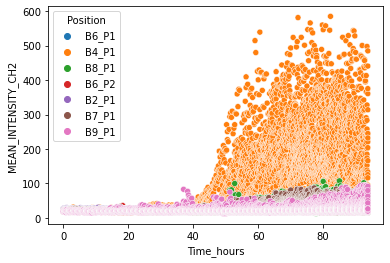

In [8]:
ax = sns.scatterplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
             data=trackmate_data, hue="Position")

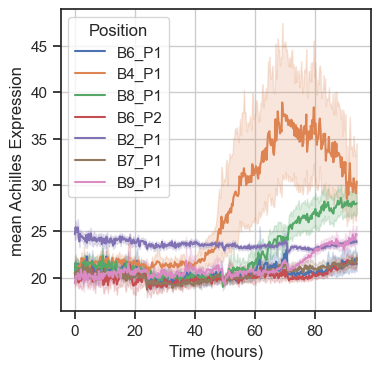

In [9]:
plt.figure(figsize=(4,4), dpi=100)
sns.set_theme(style="ticks")


ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
             data=trackmate_data, hue="Position")

#ax.get_legend().remove()

plt.xlabel(f'Time (hours)')
plt.ylabel(f'mean Achilles Expression')
plt.grid(zorder=0)  #just add this



In [10]:
subset = trackmate_data.loc[trackmate_data['Position'].isin(['B4_P1', 'B6_P2', 'B7_P1', 'B8_P1', 'B9_P1'])]

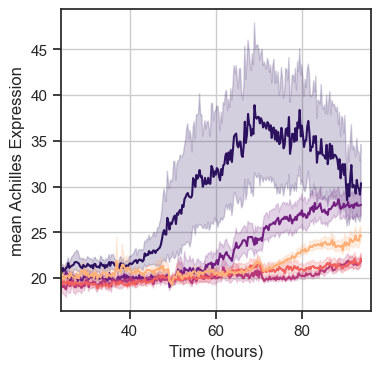

In [11]:
plt.figure(figsize=(4,4), dpi=100)
sns.set_theme(style="ticks")


ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
             data=subset, hue="Position", palette="magma")

#ax.get_legend().remove()

ax.get_legend().remove()
plt.xlim(24,96)

plt.xlabel(f'Time (hours)')
plt.ylabel(f'mean Achilles Expression')
plt.grid(zorder=0)  #just add this

plt.savefig("Bulk_timing_inhibitor.pdf")
plt.show()

In [18]:
subset2 = subset.loc[subset['Position'].isin(['B4_P1','B6_P2','B9_P1'])]

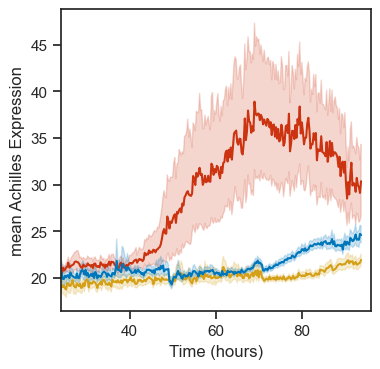

In [20]:
plt.figure(figsize=(4,4), dpi=100)
sns.set_theme(style="ticks")


ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
             data=subset2, hue="Position", palette=[ingeo_colours[4],'#D4A017',ingeo_colours[0]])

#ax.get_legend().remove()

ax.get_legend().remove()
plt.xlim(24,96)

plt.xlabel(f'Time (hours)')
plt.ylabel(f'mean Achilles Expression')

plt.savefig("Dynamics_Inhibitors_timing_inhibitor_new.pdf")
plt.show()